In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read data from CSV
data = pd.read_csv('data.csv', index_col='Dates')
# print the number of columns in the data
print("Number of columns in the data:", len(data.columns))



Number of columns in the data: 612


In [16]:
# Step 2: Calculate returns
# take only the first 10 stocks
data = data.iloc[:, :10]
returns = data.pct_change().dropna()
# print the returns along with their stock names
# print(returns)


# Step 3: Calculate covariance matrix of returns
cov_matrix = returns.cov()
# print the covariance matrix
print(cov_matrix)



             A      AAPL       ABC      ABMD       ABT      ADBE       ADM  \
A     0.000195  0.000078  0.000064  0.000135  0.000098  0.000126  0.000062   
AAPL  0.000078  0.000205  0.000048  0.000129  0.000069  0.000118  0.000048   
ABC   0.000064  0.000048  0.000310  0.000056  0.000074  0.000046  0.000051   
ABMD  0.000135  0.000129  0.000056  0.000517  0.000121  0.000190  0.000057   
ABT   0.000098  0.000069  0.000074  0.000121  0.000158  0.000097  0.000047   
ADBE  0.000126  0.000118  0.000046  0.000190  0.000097  0.000279  0.000055   
ADM   0.000062  0.000048  0.000051  0.000057  0.000047  0.000055  0.000195   
ADSK  0.000158  0.000137  0.000079  0.000225  0.000119  0.000221  0.000082   
AEE   0.000010  0.000005 -0.000002 -0.000001  0.000016  0.000019  0.000024   
AEP   0.000007  0.000002 -0.000002 -0.000003  0.000012  0.000012  0.000015   

          ADSK       AEE       AEP  
A     0.000158  0.000010  0.000007  
AAPL  0.000137  0.000005  0.000002  
ABC   0.000079 -0.000002 -0.00

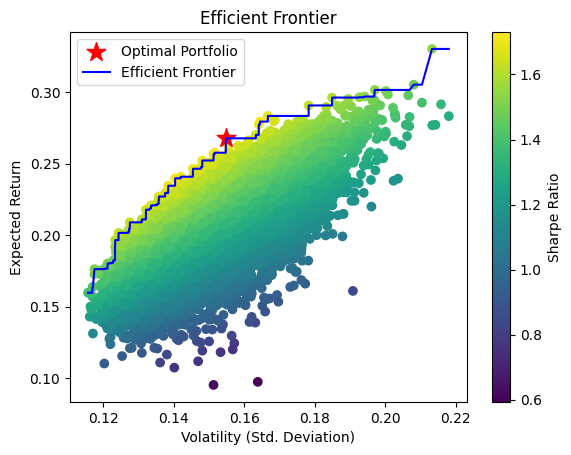

Optimal Portfolio:
Expected return: 0.2677587655738065
Volatility (Std. Deviation): 0.1547510060524349
Sharpe Ratio: 1.7302554109604997
Weights of the optimal portfolio corresponding to maximum Sharpe ratio:
A : 5.93 %
AAPL : 1.76 %
ABC : 1.18 %
ABMD : 24.59 %
ABT : 8.12 %
ADBE : 15.67 %
ADM : 5.52 %
ADSK : 1.63 %
AEE : 24.01 %
AEP : 11.58 %


In [24]:
# Step 4: Simulate random portfolios
num_portfolios = 20000
results = np.zeros((4, num_portfolios))
risk_free_rate = 0.0
max_sharpe_weight = None

for i in range(num_portfolios):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    results[3, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    if sharpe_ratio == np.max(results[2]):
        max_sharpe_weight = weights

# Step 5: Identify optimal portfolio
max_sharpe_idx = np.argmax(results[2])
optimal_return = results[0, max_sharpe_idx]
optimal_std_dev = results[1, max_sharpe_idx]
optimal_sharpe_ratio = results[2, max_sharpe_idx]

# Step 6: Plot efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev, optimal_return, marker='*', color='r', s=200, label='Optimal Portfolio')

# Sort the data based on volatility
sorted_idx = np.argsort(results[1])
sorted_returns = results[0, sorted_idx]
sorted_volatility = results[1, sorted_idx]

# Plotting the line joining points with maximum return for a given level of risk
max_return_for_given_volatility = np.maximum.accumulate(sorted_returns)
# plot a smooth curve for the maximum return for a given level of risk
plt.plot(sorted_volatility, max_return_for_given_volatility, label='Efficient Frontier', color='b')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

print("Optimal Portfolio:")
print("Expected return:", optimal_return)
print("Volatility (Std. Deviation):", optimal_std_dev)
print("Sharpe Ratio:", optimal_sharpe_ratio)
print("Weights of the optimal portfolio corresponding to maximum Sharpe ratio:")
# print the stock names along with their weights
for i in range(len(data.columns)):
    # round the weights to 4 decimal places and multiply by 100 to get percentage
    print(data.columns[i], ":", round(max_sharpe_weight[i]*100, 2), "%")
